In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('BAC.csv')

In [4]:
df

,Unnamed: 0,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C
0,0.0,Rahul,Pandey,37_M,B,175.4,85.6,37.0,1500.0,200.0,300.0
1,1.0,Rakesh,Kumar,38_M,B,NaN,xx,38.0,NaN,1000.0,NaN
2,2.0,Nitesh,Mondol,35_M,B,165.1,?,35.0,500.0,-100.0,200.0
3,3.0,Arvind,Dwivedi,40_M,A,0.0,55.6,40.0,300.0,300.0,NaN
4,4.0,Nikhil,Shikharwar,39_M,B,160.8,160.0,39.0,200.0,NaN,300.0
5,5.0,Ashutosh,Merothiya,36_M,A,xx,-60.0,36.0,100.0,400.0,NaN
6,6.0,Shubhro,Das,35_M,C,170.3,75.5,35.0,NaN,500.0,500.0
7,7.0,Suvendu,Das,34_M,C,155.1,56.8,34.0,1000.0,100.0,xx
8,8.0,Swadesh,Kumar,36_M,C,154.2,60.6,36.0,100.0,200.0,300.0
9,9.0,Arun,Vishwakarma,38_M,A,162.1,58.7,38.0,600.0,200.0,200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3523 non-null   object 
 1   Open       3523 non-null   float64
 2   High       3523 non-null   float64
 3   Low        3523 non-null   float64
 4   Close      3523 non-null   float64
 5   Adj Close  3523 non-null   float64
 6   Volume     3523 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.8+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3.523000e+03
mean,22.957905,23.220247,22.669631,22.938135,19.851501,1.174800e+08
std,13.409170,13.492552,13.321380,13.410517,10.426581,1.130062e+08
min,3.220000,3.510000,2.530000,3.140000,2.759305,4.835400e+06
25%,13.620000,13.790000,13.395000,13.560000,12.181610,5.063375e+07
50%,16.980000,17.150000,16.760000,16.950001,15.180848,8.519980e+07
75%,29.915000,30.185001,29.540001,29.875000,28.225653,1.468264e+08
max,55.040001,55.080002,54.820000,54.900002,42.099216,1.226791e+09


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,34.811729,16296700
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,34.442013,17757900
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,34.486385,14970700
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,34.434616,12599800
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,34.456806,15619400


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Release month'] = df['Date'].dt.month
df['Release month']

0        1
1        1
2        1
3        1
4        1
        ..
3518    12
3519    12
3520    12
3521    12
3522    12
Name: Release month, Length: 3523, dtype: int64

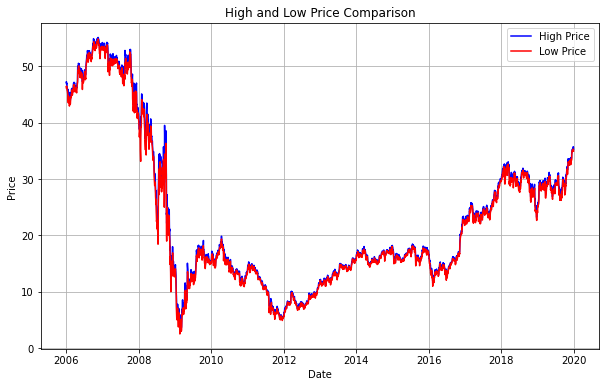

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['High'], color='blue', label='High Price')
plt.plot(df['Date'], df['Low'], color='red', label='Low Price')
plt.title('High and Low Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

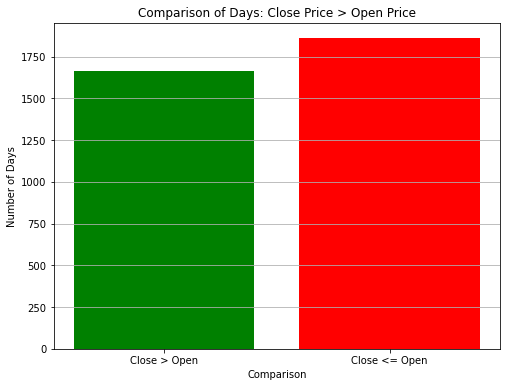

In [27]:
days_greater_close_open = df[df['Close'] > df['Open']]

# Count the number of days where the closing price is greater than the opening price
num_days_greater_close_open = len(days_greater_close_open)

# Count the number of days where the closing price is lower than or equal to the opening price
num_days_lower_equal_close_open = len(df) - num_days_greater_close_open

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Close > Open', 'Close <= Open'], [num_days_greater_close_open, num_days_lower_equal_close_open], color=['green', 'red'])
plt.title('Comparison of Days: Close Price > Open Price')
plt.xlabel('Comparison')
plt.ylabel('Number of Days')
plt.grid(axis='y')
plt.show()

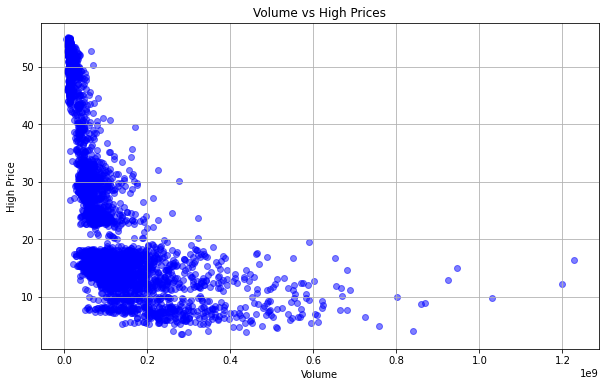

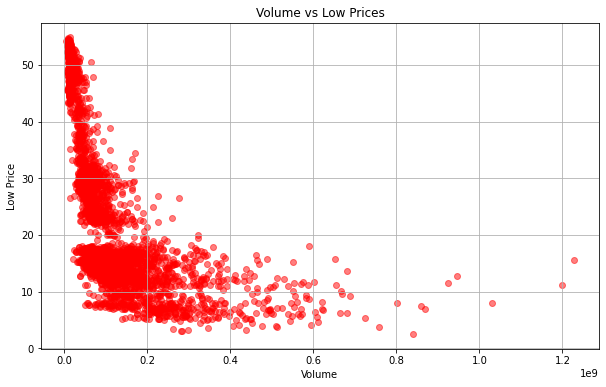

In [28]:
# Plotting the relationship between volume and high prices
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['High'], color='blue', alpha=0.5)
plt.title('Volume vs High Prices')
plt.xlabel('Volume')
plt.ylabel('High Price')
plt.grid(True)
plt.show()

# Plotting the relationship between volume and low prices
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Low'], color='red', alpha=0.5)
plt.title('Volume vs Low Prices')
plt.xlabel('Volume')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()